In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [22]:
df=pd.read_csv("E:\insideAIML\ML\drug200.csv")

In [23]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [24]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [25]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [26]:
y=df['Drug'].values

In [27]:
x[ :5, :]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [28]:
# convert object data to numeric data through label encoder 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le_gender =LabelEncoder() 
le_gender.fit(["F" ,"M"]) 
x[: , 1]=le_gender.transform(x[ : ,1])

In [33]:
x[: , 1]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0], dtype=object)

In [34]:
x[ :5, :]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.114],
       [28, 0, 'NORMAL', 'HIGH', 7.798],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [40]:
le_bp=LabelEncoder() 
le_bp.fit(['HIGH', 'LOW','NORMAL']) 
x[ : ,2]=le_bp.transform(x[ : ,2]) 

In [41]:
x[ :5, :]

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.114],
       [28, 0, 2, 'HIGH', 7.798],
       [61, 0, 1, 'HIGH', 18.043]], dtype=object)

In [44]:
le_chol=LabelEncoder() 
le_chol.fit(['NORMAL','HIGH']) 
x[:,3]=le_chol.transform(x[:,3])

In [45]:
x[ :5, :]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [47]:
set(y)

{'drugA', 'drugB', 'drugC', 'drugX', 'drugY'}

In [51]:
from sklearn.preprocessing import LabelEncoder  

le_Drug=LabelEncoder() 
le_Drug.fit(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
y=le_Drug.transform(y)

In [53]:
set(y)

{0, 1, 2, 3, 4}

In [54]:
from sklearn.model_selection import train_test_split 

In [55]:
x_train , x_test , y_train , y_test =train_test_split(x, y , random_state=50 , test_size=0.2)

In [58]:
# get a model  

from sklearn.tree import DecisionTreeClassifier 


In [59]:
model=DecisionTreeClassifier(criterion="entropy")

In [60]:
model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
y_redict =model.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score , mean_squared_error

In [63]:
accuracy_score(y_test , y_redict)

0.975

In [64]:
mean_squared_error(y_test , y_redict)

0.025

In [69]:
x[ :5, ]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [70]:
x[ :,0 ]

array([23, 47, 47, 28, 61, 22, 49, 41, 60, 43, 47, 34, 43, 74, 50, 16, 69,
       43, 23, 32, 57, 63, 47, 48, 33, 28, 31, 49, 39, 45, 18, 74, 49, 65,
       53, 46, 32, 39, 39, 15, 73, 58, 50, 23, 50, 66, 37, 68, 23, 28, 58,
       67, 62, 24, 68, 26, 65, 40, 60, 34, 38, 24, 67, 45, 60, 68, 29, 17,
       54, 18, 70, 28, 24, 41, 31, 26, 36, 26, 19, 32, 60, 64, 32, 38, 47,
       59, 51, 69, 37, 50, 62, 41, 29, 42, 56, 36, 58, 56, 20, 15, 31, 45,
       28, 56, 22, 37, 22, 42, 72, 23, 50, 47, 35, 65, 20, 51, 67, 40, 32,
       61, 28, 15, 34, 36, 53, 19, 66, 35, 47, 32, 70, 52, 49, 24, 42, 74,
       55, 35, 51, 69, 49, 64, 60, 74, 39, 61, 37, 26, 61, 22, 49, 68, 55,
       72, 37, 49, 31, 53, 59, 34, 30, 57, 43, 21, 16, 38, 58, 57, 51, 20,
       28, 45, 39, 41, 42, 73, 48, 25, 39, 67, 22, 59, 20, 36, 18, 57, 70,
       47, 65, 64, 58, 23, 72, 72, 46, 56, 16, 52, 23, 40], dtype=object)

In [71]:
plt.scatter([x_test[ :,0 ] , x_test[ :,4 ]])

TypeError: scatter() missing 1 required positional argument: 'y'

In [60]:
df=pd.read_csv("E:\insideAIML\ML\drug200.csv")

In [61]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [63]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [64]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [65]:
y=df['Drug'].values

In [66]:
x[ :5 , :]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [67]:
# convert the categorical data to integer form for training ML model 

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
Le_sex=LabelEncoder() 
Le_sex.fit(['F', 'M'])
x[:,1 ]=Le_sex.transform(x[:,1 ])

In [70]:
set(x[:,1 ])

{0, 1}

In [71]:
set(x[:,2])

{'HIGH', 'LOW', 'NORMAL'}

In [72]:
Le_BP=LabelEncoder() 
Le_BP.fit(['HIGH', 'LOW', 'NORMAL'])
x[:,2]=Le_BP.transform(x[:,2])

In [73]:
set(x[:,2])

{0, 1, 2}

In [74]:
set(x[:,3])

{'HIGH', 'NORMAL'}

In [75]:
Le_chol=LabelEncoder() 
Le_chol.fit(['HIGH', 'NORMAL'])
x[:,3]=Le_chol.transform(x[:,3])

In [76]:
set(x[:,3])

{0, 1}

In [77]:
x[ : 5 , :]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [78]:
y[ : 5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [79]:
set(y)

{'drugA', 'drugB', 'drugC', 'drugX', 'drugY'}

In [80]:
Le_drug = LabelEncoder() 
Le_drug.fit(['drugA', 'drugB', 'drugC', 'drugX', 'drugY']) 
y=Le_drug.transform(y)

In [81]:
set(y)

{0, 1, 2, 3, 4}

In [82]:
# train the model 

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=50)

In [85]:
from sklearn.tree import DecisionTreeClassifier 

In [86]:
Dt = DecisionTreeClassifier(criterion="entropy")

In [87]:
Dt.fit(x_test , y_test)

DecisionTreeClassifier(criterion='entropy')

In [88]:
y_pred = Dt.predict(x_test)

In [89]:
from sklearn.metrics import mean_squared_error , accuracy_score  
mean_squared_error(y_test , y_pred)

0.0

In [90]:
accuracy_score(y_test , y_pred)

1.0

In [91]:
# to check the data in graph by using matplotlib_

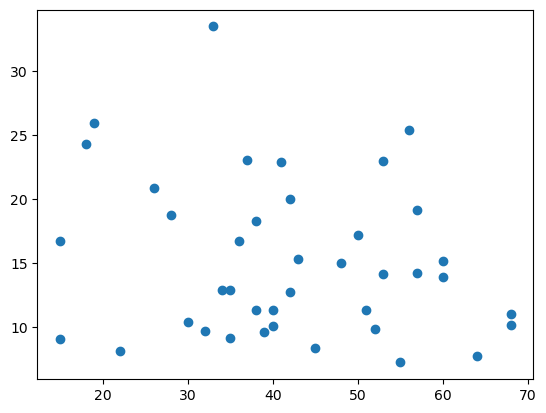

In [92]:
plt.scatter(x_test[ : , 0] , x_test[ : , 4])

In [ ]:
{0, 1, 2, 3, 4}

In [93]:
colorset =np.array(["red" , "green" , "black" ,"pink", "blue" ])

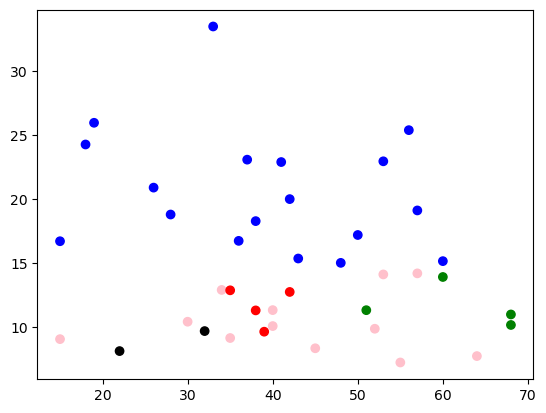

In [94]:
plt.scatter(x_test[ : , 0] , x_test[ : , 4] , c=colorset[y_test] )

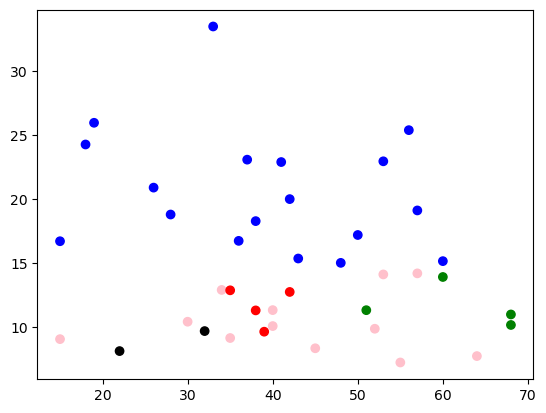

In [95]:
plt.scatter(x_test[ : , 0] , x_test[ : , 4] , c=colorset[y_pred] )

In [96]:
Dt1 = DecisionTreeClassifier(criterion="gini")
Dt1.fit(x_test , y_test)
y_pred = Dt1.predict(x_test)
accuracy_score(y_test , y_pred)

1.0